In [1]:
from saga.experiment.benchmarking.parametric import ParametricExperiment
import logging
import random
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta

%matplotlib inline

# Set random seed for reproducibility
random.seed(0)
np.random.seed(0)

logging.basicConfig(level=logging.WARNING)

In [2]:
# Step 1: Define the experiment
experiment = ParametricExperiment(trim=100) # trim to 100 instances per dataset

In [3]:
# Step 2: Prepare the datasets for the experiment
experiment.prepare(download_url="https://zenodo.org/records/10967223/files/dataset.zip?download=1")

Dataset already exists in /home/jared/.saga/datasets/parametric
Using existing shuffled datasets in /home/jared/.saga/datasets/parametric/shuffled


In [4]:
# Step 3: Run the experiment
start_time = datetime.now()

total_evals, completed_evals = 144000, 0
def print_progress(progress):
    global completed_evals
    completed_evals += 1
    percent_complete = completed_evals / total_evals
    
    elapsed_time = (datetime.now() - start_time).total_seconds()
    estimated_completion_time = start_time + timedelta(seconds=elapsed_time / percent_complete)
    estimated_completion_time_str = estimated_completion_time.strftime("%Y-%m-%d %H:%M")
    print(f"Progress: {percent_complete*100:.2f}% \t(Estimated completion time: {estimated_completion_time_str})" + " " * 100, end="\r")

experiment.run(progress_callback=print_progress)


Progress: 0.87% 	(Estimated completion time: 2024-04-12 17:31)                                                                                                    

: 

In [3]:
# Step 4: Analyze the results
experiment.analyze(
    filetype="png",
    showfliers=False,
    do_pareto_plots=True,
    do_main_effect_plots=False,
    do_dataset_plots=False,
    do_interaction_plots=False
)

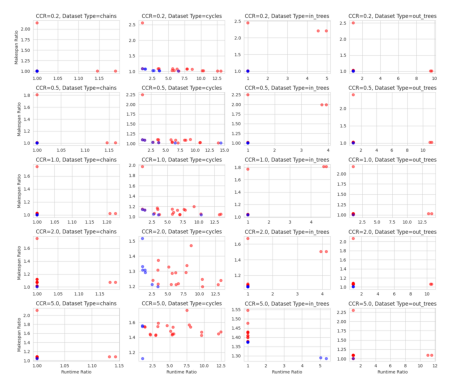

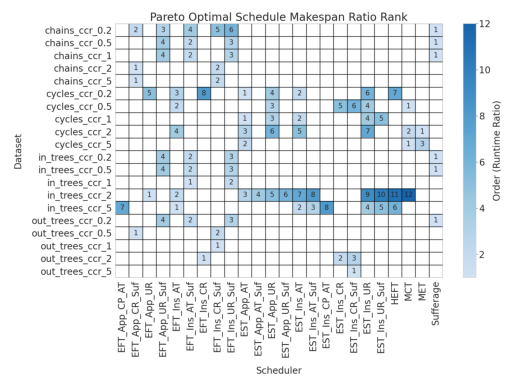

In [4]:
pareto_scatter_path = experiment.outputdir / "pareto_scatter.png"
img = plt.imread(pareto_scatter_path)
img_plot = plt.imshow(img)
plt.axis("off")
plt.show()

pareto_chart_path = experiment.outputdir / "pareto_chart.png"
img = plt.imread(pareto_chart_path)
img_plot = plt.imshow(img)
plt.axis("off")
plt.show()

# Generate All Plots
Generate all other plots and see the results in the output directory.

In [ ]:
experiment.analyze(
    filetype="png",
    showfliers=False,
    do_pareto_plots=True,
    do_main_effect_plots=True,
    do_dataset_plots=True,
    do_interaction_plots=True
)